In [8]:
# Sorting out dataset and making arrays
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.io import arff

#load dataset
ionosphere = arff.loadarff('data/dataset_59_ionosphere.arff') #ionosphere
steel_plates = arff.loadarff('data/php9xWOpn.arff') #steel_plates
bank_note = arff.loadarff('data/php50jXam.arff') #bank_note

one = pd.DataFrame(ionosphere[0]) 
two = pd.DataFrame(steel_plates[0])
three = pd.DataFrame(bank_note[0])

xone = one.iloc[:, :-1].astype(float).values
xtwo = two.iloc[:, :-1].astype(float).values
xthree = three.iloc[:, :-1].astype(float).values
yone = one.iloc[:, -1].values.astype(str)
ytwo = two.iloc[:, -1].values.astype(str)
ythree = three.iloc[:, -1].values.astype(str)

scaler = StandardScaler()
xone = scaler.fit_transform(xone)
xtwo = scaler.fit_transform(xtwo)
xthree = scaler.fit_transform(xthree)

#parameters and arrays used throughout
NUM = 50 
N_NEIGHBORS = [1, 2, 3, 4, 5]
VAR_SMOOTHING = [1e-9, 1e-5, 1e-1]
C = [0.1, 0.5, 1.0, 2.0, 5.0] 
MAX_DEPTH = [1,3,5,8,10]
ALPHA = [1e-5,1e-3,0.1,10.0]

#result arrays
knn_ionosphere, knn_steel_plates, knn_bank_note = [], [], []
gnb_ionosphere, gnb_steel_plates, gnb_bank_note = [], [], []
lr_ionosphere, lr_steel_plates, lr_bank_note = [], [], []
dtc_ionosphere, dtc_steel_plates, dtc_bank_note = [], [], []
gbc_ionosphere, gbc_steel_plates, gbc_bank_note = [], [], []
rfc_ionosphere, rfc_steel_plates, rfc_bank_note = [], [], []
mlpc_ionosphere, mlpc_steel_plates, mlpc_bank_note = [], [], []

In [9]:
#KNeighborsClassifier (K nearest neighbours)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

for i in range(NUM): #split train and test 50 by 50
    one_train, one_test, one_train_labels, one_test_labels = train_test_split(xone, yone, test_size=0.5, random_state=i) #ionosphere
    two_train, two_test, two_train_labels, two_test_labels = train_test_split(xtwo, ytwo, test_size=0.5, random_state=i) #steel_plate
    three_train, three_test, three_train_labels, three_test_labels = train_test_split(xthree, ythree, test_size=0.5, random_state=i) #bank_note
    knn_score_one, knn_score_two, knn_score_three = [], [], [] #initialise lists for error rates
    
    for n in N_NEIGHBORS: #iterate through hyperparameters
        knn = KNeighborsClassifier(n_neighbors = n) #initalise knn
        knn.fit(one_train, one_train_labels) #fit ionosphere
        one_pred = knn.predict(one_test) #predict ionosphere
        accuracy_one = accuracy_score(one_test_labels, one_pred) #calculate ionosphere accuracy
        knn_score_one.append(accuracy_one)  #add ionosphere score to list -> storing error rate instead of accuracy
        knn.fit(two_train, two_train_labels) #fit steel_plates
        two_pred = knn.predict(two_test) #predict steel_plates
        accuracy_two = accuracy_score(two_test_labels, two_pred) #calculate steel_plates accuracy
        knn_score_two.append(accuracy_two) #add steel_plates score to list -> storing error rate instead of accuracy
        knn.fit(three_train, three_train_labels) #fit bank_note
        three_pred = knn.predict(three_test) #predict bank_note
        accuracy_three = accuracy_score(three_test_labels, three_pred) #calculate bank_notes accuracy
        knn_score_three.append(accuracy_three) #add bank_note score to list -> storing error rate instead of accuracy
    
    knn_ionosphere.append(knn_score_one) #add ionosphere score to list
    knn_steel_plates.append(knn_score_two) #add steel_plates score to list
    knn_bank_note.append(knn_score_three) #add bank_note score to list

In [10]:
#GaussianNB (the Guassian form of Naive Bayes)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

for i in range(NUM): #split train and test 50 by 50
    one_train, one_test, one_train_labels, one_test_labels = train_test_split(xone, yone, test_size=0.5, random_state=i) #ionosphere
    two_train, two_test, two_train_labels, two_test_labels = train_test_split(xtwo, ytwo, test_size=0.5, random_state=i) #steel_plate
    three_train, three_test, three_train_labels, three_test_labels = train_test_split(xthree, ythree, test_size=0.5, random_state=i) #bank_note
    gnb_score_one, gnb_score_two, gnb_score_three = [], [], [] #initialise lists for error rates
    
    for n in VAR_SMOOTHING: #iterate through hyperparameters
        gnb = GaussianNB(var_smoothing = n) #initalise gnb
        gnb.fit(one_train, one_train_labels) #fit ionosphere
        one_pred = gnb.predict(one_test) #predict ionosphere
        accuracy_one = accuracy_score(one_test_labels, one_pred) #calculate ionosphere accuracy
        gnb_score_one.append(accuracy_one) #add ionosphere score to list -> storing error rate instead of accuracy
        gnb.fit(two_train, two_train_labels) #fit steel_plates
        two_pred = gnb.predict(two_test) #predict steel_plates
        accuracy_two = accuracy_score(two_test_labels, two_pred) #calculate steel_plates accuracy
        gnb_score_two.append(accuracy_two) #add steel_plates score to list -> storing error rate instead of accuracy
        gnb.fit(three_train, three_train_labels) #fit bank_note
        three_pred = gnb.predict(three_test) #predict bank_note
        accuracy_three = accuracy_score(three_test_labels, three_pred) #calculate bank_note accuracy
        gnb_score_three.append(accuracy_three) #add bank_note score to list -> storing error rate instead of accuracy
    
    gnb_ionosphere.append(gnb_score_one) #add ionosphere score to list
    gnb_steel_plates.append(gnb_score_two) #add steel_plates score to list
    gnb_bank_note.append(gnb_score_three) #add bank_note score to list

In [11]:
#LogisticRegression (essentially, a perceptron)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

for i in range(NUM): #split train and test 50 by 50
    one_train, one_test, one_train_labels, one_test_labels = train_test_split(xone, yone, test_size=0.5, random_state=i) #ionosphere
    two_train, two_test, two_train_labels, two_test_labels = train_test_split(xtwo, ytwo, test_size=0.5, random_state=i) #steel_plate
    three_train, three_test, three_train_labels, three_test_labels = train_test_split(xthree, ythree, test_size=0.5, random_state=i) #bank_note
    lr_score_one, lr_score_two, lr_score_three = [], [], [] #initialise lists for error rates
    
    for n in C: #iterate through hyperparameters
        lr = LogisticRegression(C = n) #initalise lr
        lr.fit(one_train, one_train_labels) #fit ionosphere
        one_pred = lr.predict(one_test) #predict ionosphere
        accuracy_one = accuracy_score(one_test_labels, one_pred) #calculate ionosphere accuracy
        lr_score_one.append(accuracy_one) #add ionosphere score to list
        lr.fit(two_train, two_train_labels) #fit steel_plates
        two_pred = lr.predict(two_test) #predict steel_plates
        accuracy_two = accuracy_score(two_test_labels, two_pred) #calculate steel_plates accuracy
        lr_score_two.append(accuracy_two) #add steel_plates score to list
        lr.fit(three_train, three_train_labels) #fit bank_note
        three_pred = lr.predict(three_test) #predict bank_note
        accuracy_three = accuracy_score(three_test_labels, three_pred) #calculate bank_notes accuracy
        lr_score_three.append(accuracy_three) #add bank_note score to list
    
    lr_ionosphere.append(lr_score_one) #add ionosphere score to list
    lr_steel_plates.append(lr_score_two) #add steel_plates score to list
    lr_bank_note.append(lr_score_three) #add bank_note score to list

In [12]:
#DecisionTreeClasifier (A decision tree (DT))
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

for i in range(NUM): #split train and test 50 by 50
    one_train, one_test, one_train_labels, one_test_labels = train_test_split(xone, yone, test_size=0.5, random_state=i) #ionosphere
    two_train, two_test, two_train_labels, two_test_labels = train_test_split(xtwo, ytwo, test_size=0.5, random_state=i) #steel_plate
    three_train, three_test, three_train_labels, three_test_labels = train_test_split(xthree, ythree, test_size=0.5, random_state=i) #bank_note
    dtc_score_one, dtc_score_two, dtc_score_three = [], [], [] #initialise lists for error rates
    
    for n in MAX_DEPTH: #iterate through hyperparameters
        dtc = DecisionTreeClassifier(max_depth = n) #initalise dtc
        dtc.fit(one_train, one_train_labels) #fit ionosphere
        one_pred = dtc.predict(one_test) #predict ionosphere
        accuracy_one = accuracy_score(one_test_labels, one_pred) #calculate ionos phereaccuracy
        dtc_score_one.append(accuracy_one) #add ionosphere score to list
        dtc.fit(two_train, two_train_labels) #fit steel_plates
        two_pred = dtc.predict(two_test) #predict steel_plates
        accuracy_two = accuracy_score(two_test_labels, two_pred) #calculate steel_plates accuracy
        dtc_score_two.append(accuracy_two) #add steel_plates score to list
        dtc.fit(three_train, three_train_labels) #fit bank_note
        three_pred = dtc.predict(three_test) #predict bank_note
        accuracy_three = accuracy_score(three_test_labels, three_pred) #calculate bank_note accuracy
        dtc_score_three.append(accuracy_three) #add bank_note score to list
    
    dtc_ionosphere.append(dtc_score_one) #add ionosphere score to list
    dtc_steel_plates.append(dtc_score_two) #add steel_plates score to list
    dtc_bank_note.append(dtc_score_three) #add bank_note score to list

In [13]:
#GradientBoostingClassifier (Gradient Boosted DTs)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

for i in range(NUM): #split train and test 50 by 50
    one_train, one_test, one_train_labels, one_test_labels = train_test_split(xone, yone, test_size=0.5, random_state=i) #ionosphere
    two_train, two_test, two_train_labels, two_test_labels = train_test_split(xtwo, ytwo, test_size=0.5, random_state=i) #steel_plate
    three_train, three_test, three_train_labels, three_test_labels = train_test_split(xthree, ythree, test_size=0.5, random_state=i) #bank_note
    gbc_score_one, gbc_score_two, gbc_score_three = [], [], [] #initialise lists for error rates
    
    for n in MAX_DEPTH: #iterate through hyperparameters
        gbc = GradientBoostingClassifier(max_depth = n) #initalise gbc
        gbc.fit(one_train, one_train_labels) #fit ionosphere
        one_pred = gbc.predict(one_test) #predict ionosphere
        accuracy_one = accuracy_score(one_test_labels, one_pred) #calculate ionosphere accuracy
        gbc_score_one.append(accuracy_one) #add ionosphere score to list
        gbc.fit(two_train, two_train_labels) #fit steel_plates
        two_pred = gbc.predict(two_test) #predict steel_plates
        accuracy_two = accuracy_score(two_test_labels, two_pred) #calculate steel_plates accuracy
        gbc_score_two.append(accuracy_two) #add steel_plates score to list
        gbc.fit(three_train, three_train_labels) #fit bank_note
        three_pred = gbc.predict(three_test) #predict bank_note
        accuracy_three = accuracy_score(three_test_labels, three_pred) #calculate bank_note accuracy
        gbc_score_three.append(accuracy_three) #add bank_note score to list
    
    gbc_ionosphere.append(gbc_score_one) #add ionosphere score to list
    gbc_steel_plates.append(gbc_score_two) #add steel_plates score to list
    gbc_bank_note.append(gbc_score_three) #add bank_note score to list

In [14]:
#RandomForestClassifier (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

for i in range(NUM): #split train and test 50 by 50
    one_train, one_test, one_train_labels, one_test_labels = train_test_split(xone, yone, test_size=0.5, random_state=i) #ionosphere
    two_train, two_test, two_train_labels, two_test_labels = train_test_split(xtwo, ytwo, test_size=0.5, random_state=i) #steel_plate
    three_train, three_test, three_train_labels, three_test_labels = train_test_split(xthree, ythree, test_size=0.5, random_state=i) #bank_note
    rfc_score_one, rfc_score_two, rfc_score_three = [], [], [] #initialise lists for error rates
    
    for n in MAX_DEPTH: #iterate through hyperparameters
        rfc = RandomForestClassifier(max_depth = n) #initalise rfc
        rfc.fit(one_train, one_train_labels) #fit ionosphere
        one_pred = rfc.predict(one_test) #predict ionosphere
        accuracy_one = accuracy_score(one_test_labels, one_pred) #calculate ionosphere accuracy
        rfc_score_one.append(accuracy_one) #add ionosphere score to list
        rfc.fit(two_train, two_train_labels) #fit steel_plates
        two_pred = rfc.predict(two_test) #predict steel_plates
        accuracy_two = accuracy_score(two_test_labels, two_pred) #calculate steel_plates accuracy
        rfc_score_two.append(accuracy_two) #add steel_plates score to list
        rfc.fit(three_train, three_train_labels) #fit bank_note
        three_pred = rfc.predict(three_test) #predict bank_note
        accuracy_three = accuracy_score(three_test_labels, three_pred) #calculate bank_note accuracy
        rfc_score_three.append(accuracy_three) #add bank_note score to list
    
    rfc_ionosphere.append(rfc_score_one) #add ionosphere score to list
    rfc_steel_plates.append(rfc_score_two) #add steel_plates score to list
    rfc_bank_note.append(rfc_score_three) #add bank_note score to list

In [15]:
#MLPClassifier (Neural Network)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

for i in range(NUM): #split train and test 50 by 50
    one_train, one_test, one_train_labels, one_test_labels = train_test_split(xone, yone, test_size=0.5, random_state=i) #ionosphere
    two_train, two_test, two_train_labels, two_test_labels = train_test_split(xtwo, ytwo, test_size=0.5, random_state=i) #steel_plate
    three_train, three_test, three_train_labels, three_test_labels = train_test_split(xthree, ythree, test_size=0.5, random_state=i) #bank_note
    mlpc_score_one, mlpc_score_two, mlpc_score_three = [], [], [] #initialise lists for error rates
    
    for n in ALPHA: #iterate through hyperparameters
        mlpc = MLPClassifier(alpha = n) #initalise mlpc
        mlpc.fit(one_train, one_train_labels) #fit ionosphere
        one_pred = mlpc.predict(one_test) #predict ionosphere
        accuracy_one = accuracy_score(one_test_labels, one_pred) #calculate ionosphere accuracy
        mlpc_score_one.append(accuracy_one) #add ionosphere score to list
        mlpc.fit(two_train, two_train_labels) #fit steel_plates
        two_pred = mlpc.predict(two_test) #predict steel_plates
        accuracy_two = accuracy_score(two_test_labels, two_pred) #calculate steel_plates accuracy
        mlpc_score_two.append(accuracy_two) #add steel_plates score to list
        mlpc.fit(three_train, three_train_labels) #fit bank_note
        three_pred = mlpc.predict(three_test) #predict bank_note
        accuracy_three = accuracy_score(three_test_labels, three_pred) #calculate bank_note accuracy
        mlpc_score_three.append(accuracy_three) #add bank_note score to list
    
    mlpc_ionosphere.append(mlpc_score_one) #add ionosphere score to list
    mlpc_steel_plates.append(mlpc_score_two) #add steel_plates score to list
    mlpc_bank_note.append(mlpc_score_three) #add bank_note score to list

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_

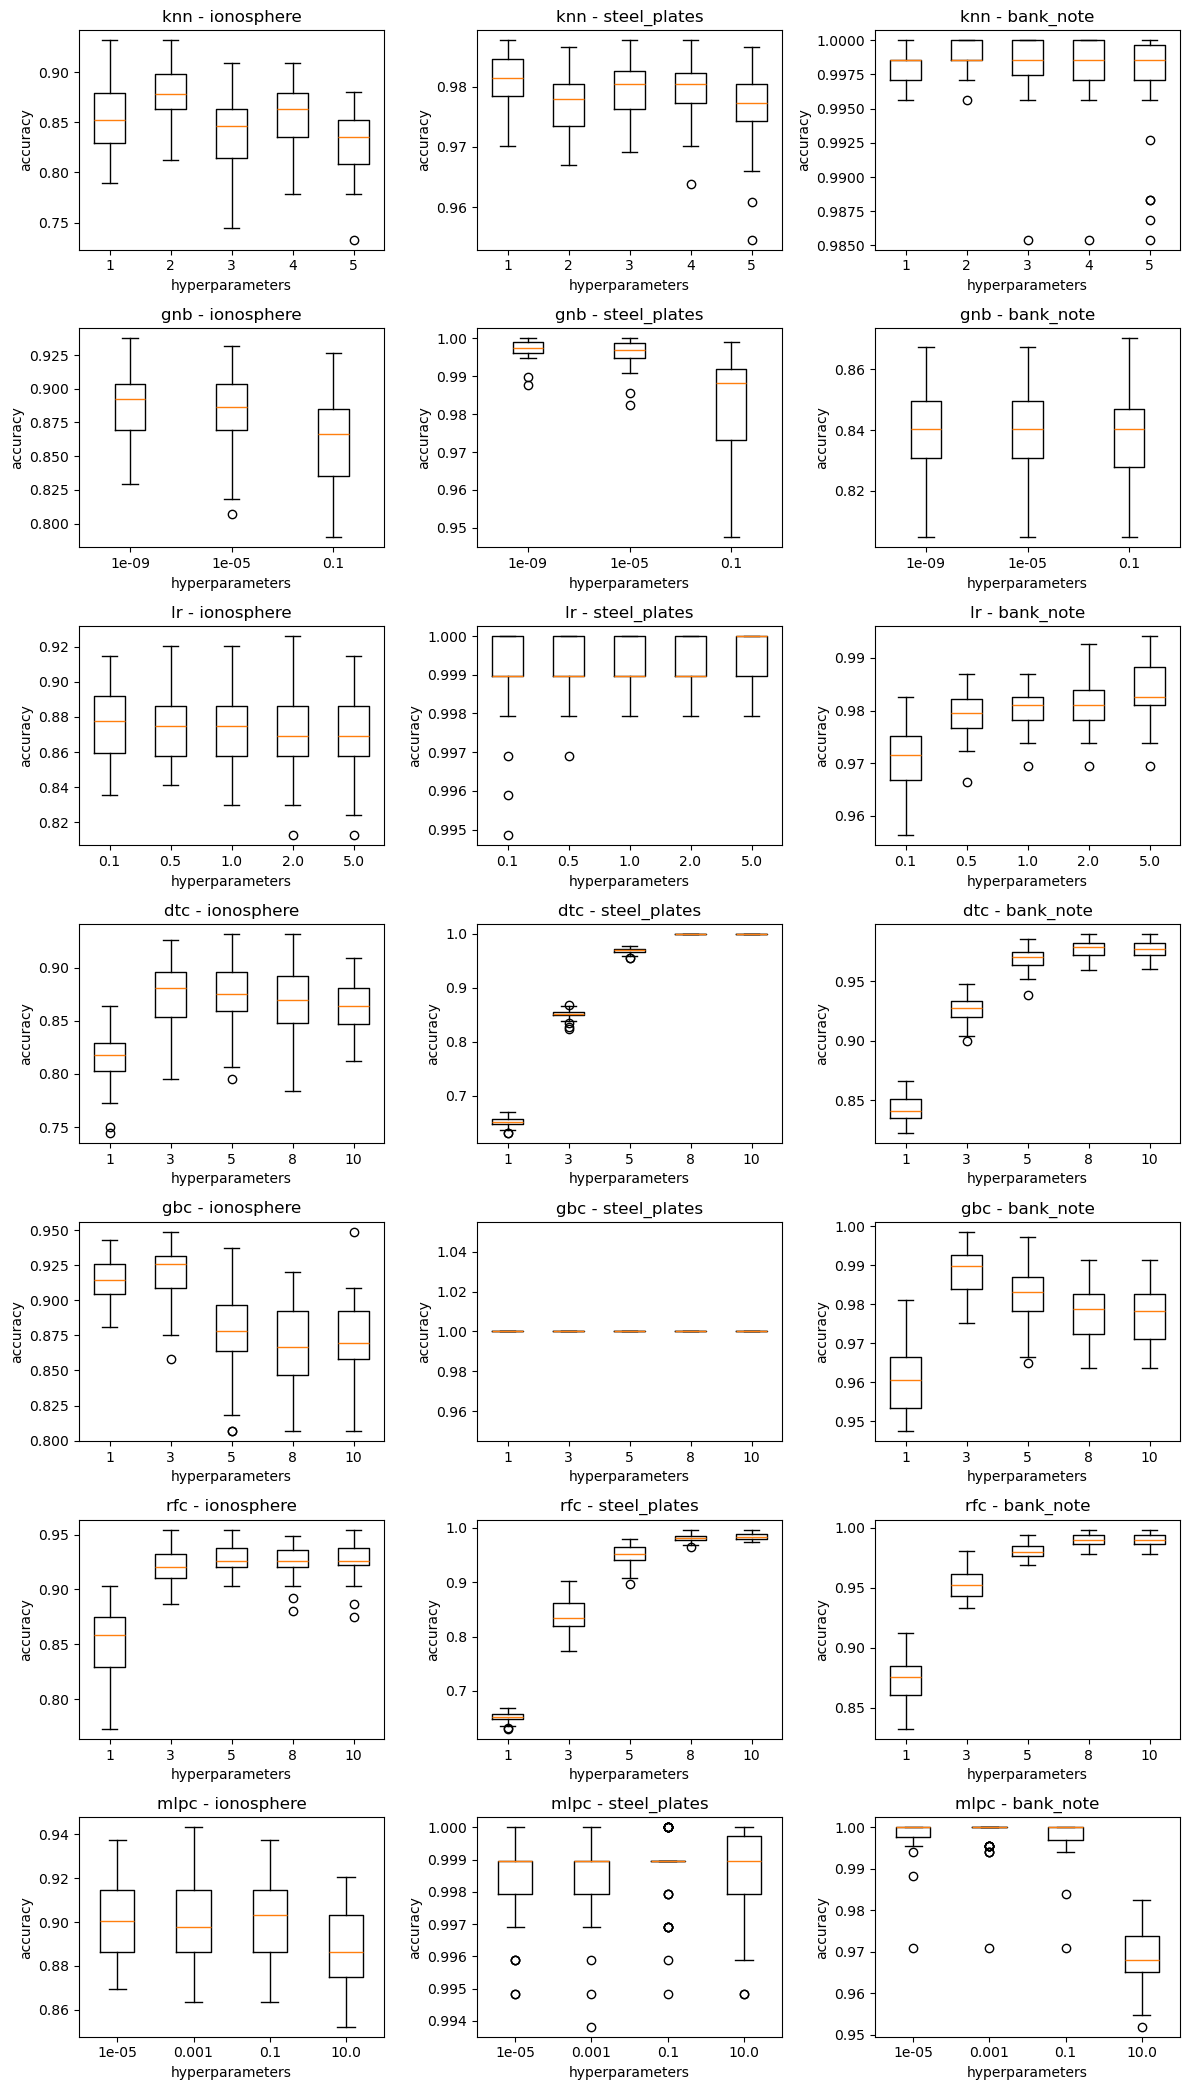

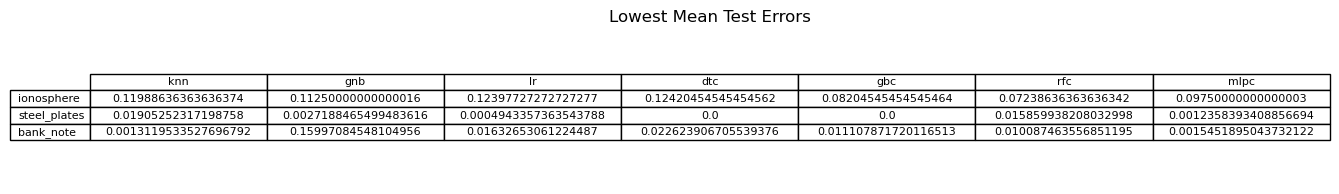

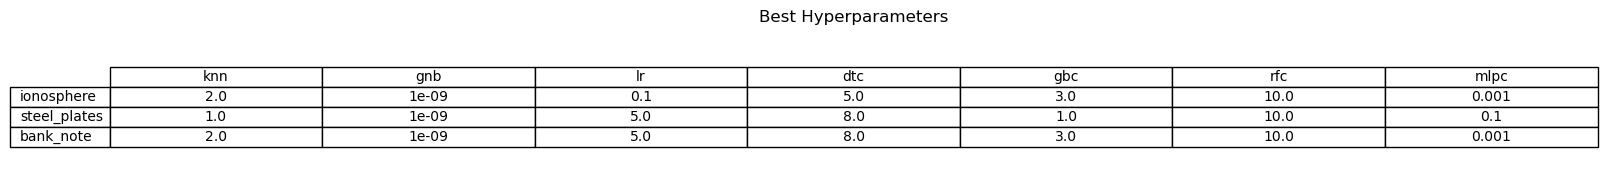

In [16]:
#Printing out lowest mean error and best hyperparameter
#Plotting all points done in algorithms
import matplotlib.pyplot as plt
import pandas as pd

mean_error = {}
best_hyper = {}
data_name = ['ionosphere', 'steel_plates', 'bank_note']
algorithms = ['knn', 'gnb', 'lr', 'dtc', 'gbc', 'rfc', 'mlpc']
hyperparameters = {'knn': N_NEIGHBORS,
                   'gnb': VAR_SMOOTHING,
                   'lr': C,
                   'dtc': MAX_DEPTH,
                   'gbc': MAX_DEPTH,
                   'rfc': MAX_DEPTH,
                   'mlpc': ALPHA}

result = {'knn':[knn_ionosphere, knn_steel_plates, knn_bank_note], 
          'gnb':[gnb_ionosphere, gnb_steel_plates, gnb_bank_note], 
          'lr':[lr_ionosphere, lr_steel_plates, lr_bank_note], 
          'dtc':[dtc_ionosphere, dtc_steel_plates, dtc_bank_note], 
          'gbc':[gbc_ionosphere, gbc_steel_plates, gbc_bank_note], 
          'rfc':[rfc_ionosphere, rfc_steel_plates, rfc_bank_note], 
          'mlpc':[mlpc_ionosphere, mlpc_steel_plates, mlpc_bank_note]} #store all results in array

#convert datasets -> dataframes
for key, value in result.items(): #iterate through array
    for i, dataset in enumerate(value): #iterate through datasets
        df = pd.DataFrame(dataset) #convert to dataframe
        df.columns = hyperparameters[key] #add hyperparameter as column
        result[key][i] = df #store in array

fig, axs = plt.subplots(7, 3, figsize=(12, 21))
for i, algorithm in enumerate(algorithms): #iterate through algorithms
    for j, data_point in enumerate(data_name): #iterate through datasets
        df = result[algorithm][j] #get result
        ax = axs[i, j] #make plots for each algorithm and 
        ax.boxplot(df.values, labels = df.columns) #plot boxplot
        ax.set_title(algorithm + " - " + data_point) #set title for each boxplot
        ax.set_xlabel("hyperparameters") #set x and y labels
        ax.set_ylabel("accuracy")
plt.tight_layout() #plot layout
plt.show() #show plot

for i in algorithms: #iterate through algorithms
    mean_error[i] = {} #initialise mean and best hyper arrays
    best_hyper[i] = {}
    for j, data_point in enumerate(data_name): #iterate through datasets
        k = 1 - result[i][j].mean() #calculate mean error and best hyper
        mean_error[i][data_point] = k.min() #store in arrays
        best_hyper[i][data_point] = k.idxmin() 
mean_error_df = pd.DataFrame(mean_error) #convert to dataframe
best_hyper_df = pd.DataFrame(best_hyper)

fig, ax = plt.subplots(figsize=(16,2))
ax.axis('off')
mean_error_table = ax.table(cellText = mean_error_df.values, #output the lowest mean error as a table
                 rowLabels = mean_error_df.index,
                 colLabels = mean_error_df.columns,
                 cellLoc='center',
                 loc='center')

mean_error_table.scale(1, 1) #scale table
plt.title('Lowest Mean Test Errors') #add title

fig, ax = plt.subplots(figsize=(16,2))
ax.axis('off')
best_hyper_table = ax.table(cellText = best_hyper_df.values, #output the lowest mean error as a table
                 rowLabels = best_hyper_df.index,
                 colLabels = best_hyper_df.columns,
                 cellLoc='center',
                 loc='center')
best_hyper_table.scale(1.2, 1.2) #scale
plt.title('Best Hyperparameters') #add title
plt.show()